<a href="https://colab.research.google.com/github/Ravi-shankar100/GRIP-Tasks/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ravi Shankar Yanduru

Task6 : Prediction using Decision Tree Algorithm

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Load the iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris_data = pd.read_csv(url)

In [ ]:
#See the first 5 rows
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Statistical Information about the data
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
#Checking null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##Data Visualization

<BarContainer object of 150 artists>

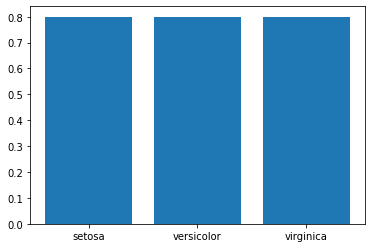

In [ ]:
#Balanced Data
plt.bar(iris_data["species"],height = 0.8)

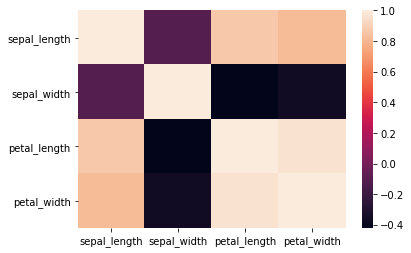

In [ ]:
#Coorelation plot
sns.heatmap(iris_data.corr())

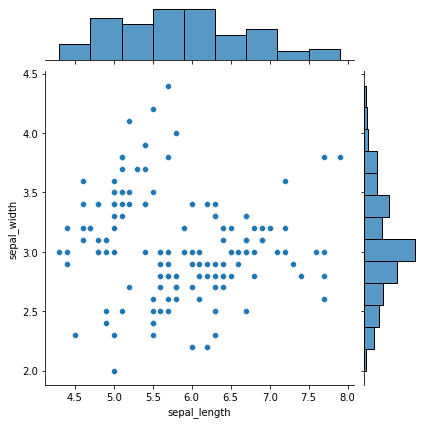

In [ ]:
#Plot for sepal length and sepal width
sns.jointplot(x = "sepal_length",y = "sepal_width",data = iris_data)

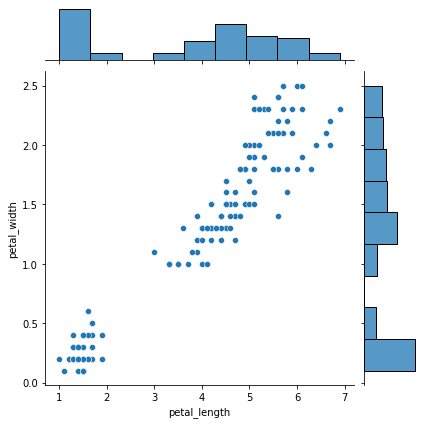

In [ ]:
#Plot for petal length and petal width
sns.jointplot(x = "petal_length",y = "petal_width",data = iris_data)

In [ ]:
#Getting the X and y data
X = iris_data.iloc[:,[0,1,2,3]]
y = iris_data.iloc[:,-1]

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)

##Decision Tree Classifier

In [ ]:
#Fit on the data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Prediction on the train and test data
y_trainpred = classifier.predict(X_train)
y_testpred = classifier.predict(X_test)

##Metrics

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_testpred)
print(cm)

score = accuracy_score(y_train,y_trainpred)
print("The training set accuracy is : ", score)

score1 = accuracy_score(y_test,y_testpred)
print("The test set accuracy is : ", score1)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The training set accuracy is :  1.0
The test set accuracy is :  1.0


##Tree Structure

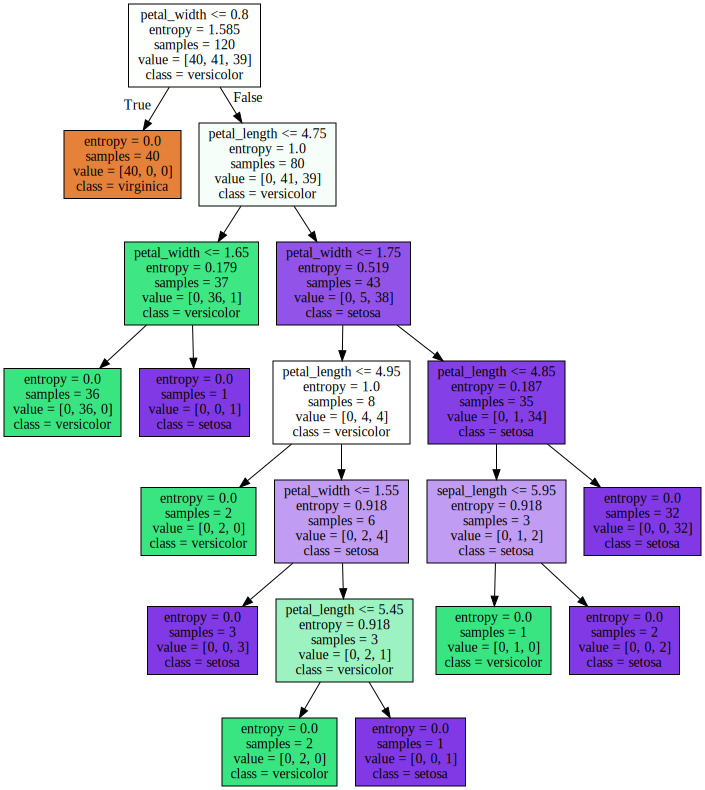

In [ ]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.value_counts().index,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph